<center>
    <h1 id='binary-classification' style='color:#7159c1'>🧠 Binary Classification 🧠</h1>
    <i>Classificating Data</i>
</center>

Some Key Concepts:

> **Cross-Entropy** - `while the MAE is the Loss Function often applied to measure the Regression/Prediction Models, the Cross-Entropy is often applied to measure the Binary Classifications`;

>> `Different from the MAE, this Loss Function doesn't measure the difference between the real value with the prediction one, but yes,  the probability distribution of the classes`;

<br />

> **Sigmoid Activation** - `while the ReLU is the Activation Function often applied in Regression/Prediction Models, Sigmoid is often applied in Binary Classifications`;

>> `As long the Cross-Entropy must receive probabilities as input to calculate the loss, the Sigmoid Function converts the model outputs into probabilities`;

<br />

> **Threshold** - `the probabilities go from 0.0 to 1.0 and, when working with Binary Classifications, the threshold is often defined as 0.5, which means, when the output is lower than 0.5, the predicted class will be CLASS_1; and when the output is equal or higher than 0.5,  the predicted class will be CLASS_2`.

In [1]:
# ---- Importations ----
import pandas as pd # pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib
import mplcyberpunk # pip install mplcyberpunk
from sklearn.model_selection import train_test_split # pip install sklearn
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras import layers

plt.style.use('cyberpunk')

# ---- Preparing Dataset ----
autos_df = pd.read_csv('./datasets/autos.csv')
autos_df = autos_df.select_dtypes(exclude='object')

X = autos_df.copy()
y = X.pop('price')

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y
    , train_size=0.70
    , test_size=0.30
    , random_state=20242301
)

<AxesSubplot: title={'center': 'Accuracy'}>

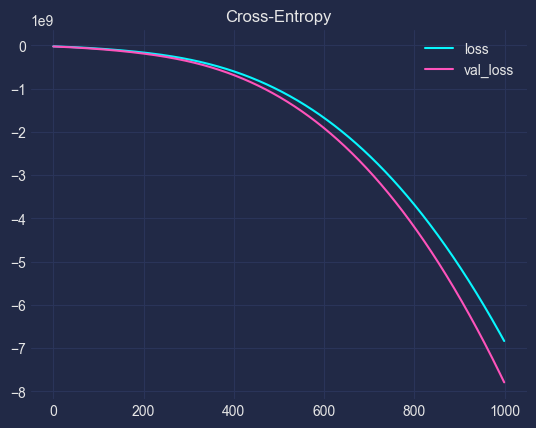

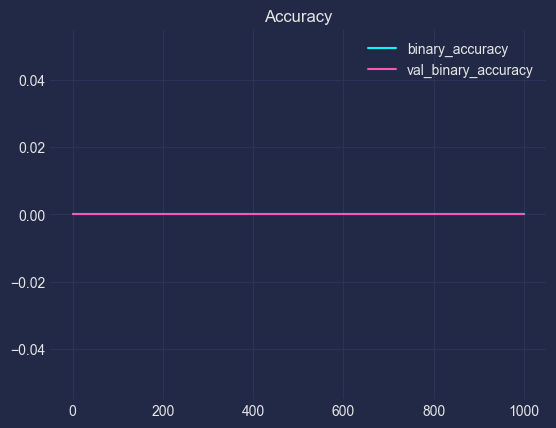

In [2]:
# ---- Importing ----
from tensorflow import keras # pip install tensorflow
from tensorflow.keras import layers

# ---- Creating the Model ----
model = keras.Sequential([
	# hidden
	layers.Dense(units=4, activation='relu', input_shape=[16]),
	layers.Dense(units=4, activation='relu'),

	# outputs
	layers.Dense(units=1, activation='sigmoid'),
])

# ---- Optimizer and Activation Functions ----
model.compile(
	optimizer='adam',
	loss='binary_crossentropy',
	metrics=['binary_accuracy'],
)

# ---- Early Stopping ----
early_stopping = keras.callbacks.EarlyStopping(
	min_delta=0.001,
	patience=10,
	restore_best_weights=True,
)

# ---- Fitting the Model ----
history = model.fit(
	X_train, y_train,
	validation_data=(X_valid, y_valid),
	batch_size=512,
	epochs=1000,
	callbacks=[early_stopping],
	verbose=0,
)

# ---- Plotting the Losses ----
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title='Cross-Entropy')
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title='Accuracy')

---

Indicator that the neural network is good:

> `the accuracy rose at the same rate as the cross-entropy fell, so it appears that minimizing cross-entropy was a good stand-in`.

In [3]:
# ---- Random Forest Classifier ----
#
# - We can also make Binary Classifications with
# sklearn rather than using Deep Learning
#
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_valid)

---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).